<a href="https://colab.research.google.com/github/lupalon/DMCyT/blob/main/Matematica_II/Grafico_curvas_restricciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

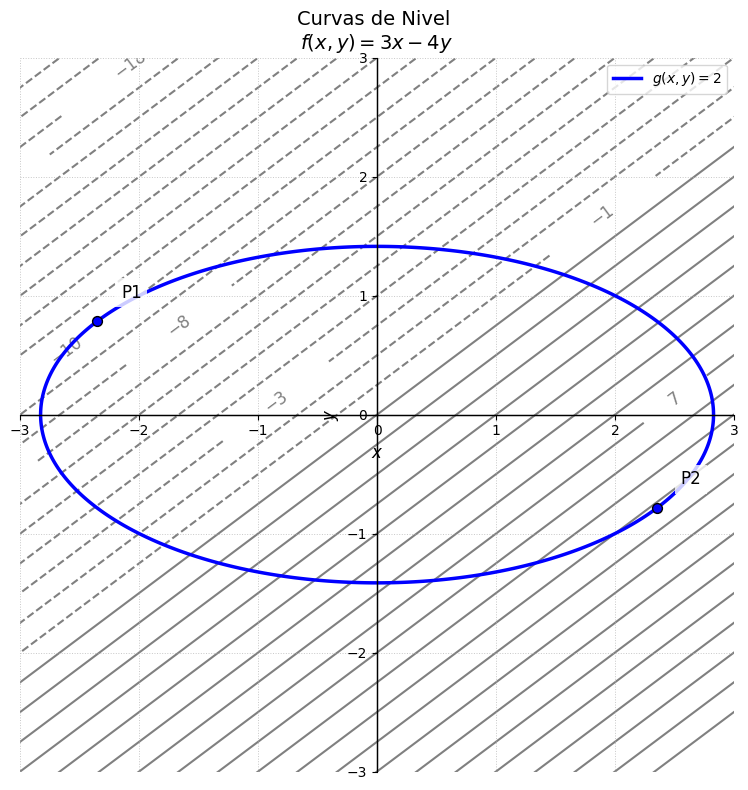

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import latex

# ------------------------------------------
# 1. Funciones simbólicas y numéricas
# ------------------------------------------
x, y, lam = sp.symbols('x y lam')
nivel_restriccion = 2  # Nivel de la curva g(x, y) = c
# Editar estas dos funciones:
f_expr = 3*x-4*y#x**2 + (y-1)**2
g_expr = (x/2)**2 + y**2 # curva g(x,y) = c

# Funciones numéricas (para graficar)
f = sp.lambdify((x, y), f_expr, 'numpy')
g = sp.lambdify((x, y), g_expr, 'numpy')  # agregamos 1 para obtener g(x,y)=1

# Gradientes
grad_f_expr = [sp.diff(f_expr, var) for var in (x, y)]
grad_g_expr = [sp.diff(g_expr, var) for var in (x, y)]
grad_f = sp.lambdify((x, y), grad_f_expr, 'numpy')
grad_g = sp.lambdify((x, y), grad_g_expr, 'numpy')

# ------------------------------------------
# 2. Parámetro de control
# ------------------------------------------
usar_lagrange = True  # Cambiar a False si querés usar puntos manuales
usar_gradientes = False #Cambiar si se quieren incluir los gradientes en cada punto de tangencia y extra
mostrar_campo_gradiente_f = False#True # Incluir campo de gradiente de f
# ------------------------------------------
# 3. Obtener puntos de tangencia
# ------------------------------------------
grad_f_const = all([expr.free_symbols == set([x, y]) for expr in [f_expr]])

if usar_lagrange:
    try:
        # Sistema con g(x,y) - c
        sistema = [
            sp.simplify(grad_f_expr[0] - lam * grad_g_expr[0]),
            sp.simplify(grad_f_expr[1] - lam * grad_g_expr[1]),
            g_expr - nivel_restriccion
        ]

        soluciones = sp.solve(sistema, (x, y, lam), dict=True)

        if not soluciones:
            print("⚠️ No se encontraron soluciones simbólicas con Lagrange. Revisá f, g o considerá usar un método numérico.")
            tangency_points = {}

        else:
            # Filtrar puntos válidos de tangencia
            tangency_points = {}
            i = 1
            for sol in soluciones:
                x_val = float(sol[x].evalf())
                y_val = float(sol[y].evalf())

                # Evaluar si está sobre la curva g(x,y) = nivel
                g_val = float(g(x_val, y_val))
                if not np.isclose(g_val, nivel_restriccion, atol=1e-4):
                    continue

                # Evaluar gradientes y chequear colinealidad
                gf = np.array(grad_f(x_val, y_val))
                gg = np.array(grad_g(x_val, y_val))
                cross = gf[0] * gg[1] - gf[1] * gg[0]

                if np.isclose(cross, 0, atol=1e-5):
                    tangency_points[f"P{i}"] = (x_val, y_val)
                    i += 1

            if not tangency_points:
                print("⚠️ No se encontraron puntos que cumplan condición de tangencia.")

    except Exception as e:
        print("⚠️ Error al resolver con Lagrange:", e)
        tangency_points = {}

else:
    # Modo manual
    tangency_points = {
        "P": (3, 0),
        "Q": (-1, 0),
        "R": (1/5, np.sqrt(21)/5),
        "S": (1/5, -np.sqrt(21)/5)
    }
# ------------------------------------------
# 4. Puntos extra (no candidatos)
# ------------------------------------------
extra_points = {
   # "A": (1.5, 2.5),
   # "B": (-2, -0.5)
}

# ------------------------------------------
# 5. Graficar
# ------------------------------------------
# Malla
x_vals = np.linspace(-10, 10, 1000)
y_vals = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Restricción: g(x,y)=1 → curva parametrizada (elipse)
theta = np.linspace(0, 2 * np.pi, 300)
x_g = 2 * np.cos(theta) + 1
y_g = np.sin(theta)

# Figura
fig, ax = plt.subplots(figsize=(8, 8))

# Curvas de nivel de f (en colores)
#contours = ax.contour(X, Y, Z, levels=np.arange(-20, 20, 1), cmap='coolwarm', zorder=-1)
#manual_positions = [(-1.5, 0.5), (-1, 0), (-0.5, 0.5), (0.5, -0.5), (1, -1), (2, 0.5)]
#ax.clabel(contours, inline=True, fontsize=12)#,manual=manual_positions)


# Curvas de nivel negativas (punteadas)
neg_levels = np.arange(-20, 0, 1)
cs_neg = ax.contour(X, Y, Z, levels=neg_levels, colors='gray', linestyles='dashed', zorder=-1)
ax.clabel(cs_neg, inline=True, fontsize=12)

# Curvas de nivel positivas (sólidas)
pos_levels = np.arange(0, 20, 1)
cs_pos = ax.contour(X, Y, Z, levels=pos_levels, colors='gray', linestyles='solid', zorder=-1)
ax.clabel(cs_pos, inline=True, fontsize=12)

# Curva de restricción
# Dibuja g(x,y) = nivel_restriccion
cs_g = ax.contour(X, Y, g(X, Y), levels=[nivel_restriccion], colors='blue', linewidths=2.5, linestyles='solid')

# Agrega entrada artificial para la leyenda
ax.plot([], [], color='blue', linestyle='solid', linewidth=2.5, label=f'$g(x, y) = {nivel_restriccion}$')

# Puntos de tangencia y gradientes
for label, (x_t, y_t) in tangency_points.items():
    ax.scatter(x_t, y_t, s=50,color='blue',edgecolors='black',zorder=3)
    if usar_gradientes:
      u, v = grad_f(x_t, y_t)
      s, t = grad_g(x_t, y_t)
      ax.quiver(x_t, y_t, s, t, angles='xy', scale_units='xy', scale=4, color='blue', width=0.006,alpha=0.8)
      ax.quiver(x_t, y_t, u, v, angles='xy', scale_units='xy', scale=4, color='k',width=0.003,alpha=0.8)
    ax.text(x_t + 0.2, y_t + 0.2, label, fontsize=12,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Puntos extra
for label, (x_e, y_e) in extra_points.items():
    ax.scatter(x_e, y_e, color='black', zorder=2)
    u, v = grad_f(x_e, y_e)
    s, t = grad_g(x_e, y_e)
    ax.quiver(x_e, y_e, u, v, angles='xy', scale_units='xy', scale=8, color='gray', alpha=0.4, width=0.002)
    ax.text(x_e + 0.2, y_e + 0.2, label, fontsize=12, color='gray',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))

#Campo gradiente
if mostrar_campo_gradiente_f:
    skip = (slice(None, None, 50), slice(None, None, 50))

    # Evaluamos gradiente en un punto cualquiera
    grad_fx, grad_fy = grad_f(0, 0)

    # Verificamos si el gradiente es constante
    if np.allclose(grad_f(X[0, 0], Y[0, 0]), (grad_fx, grad_fy)):
        # Campo constante: flechas todas iguales
        U_const = np.full_like(X[skip], grad_fx)
        V_const = np.full_like(Y[skip], grad_fy)
        ax.quiver(X[skip], Y[skip], U_const, V_const, color='black', alpha=0.8, scale=50, width=0.002, zorder=0)
    else:
        # Campo no constante
        U, V = grad_f(X, Y)
        ax.quiver(X[skip], Y[skip], U[skip], V[skip], color='black', alpha=0.8, scale=50, width=0.002, zorder=0)

# Estética
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_aspect('equal')
ax.axhline(0, color='k', linewidth=1)
ax.axvline(0, color='k', linewidth=1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines[['right', 'top']].set_color('none')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
titulo_funcion = f'$f(x, y) = {latex(f_expr)}$'
ax.set_title(f'Curvas de Nivel \n{titulo_funcion}', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.margins(0)
plt.savefig('curva_de_nivel_4.png',dpi=300)
# Mostrar el gráfico
plt.show()
plt.show()
